In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import random
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

# Data Cleaning and Preparation

In [2]:
nba = pd.read_csv('all_seasons.csv')
nba.head()
nba.info()
nba_df = pd.DataFrame(nba)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12305 entries, 0 to 12304
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         12305 non-null  int64  
 1   player_name        12305 non-null  object 
 2   team_abbreviation  12305 non-null  object 
 3   age                12305 non-null  float64
 4   player_height      12305 non-null  float64
 5   player_weight      12305 non-null  float64
 6   college            12305 non-null  object 
 7   country            12305 non-null  object 
 8   draft_year         12305 non-null  object 
 9   draft_round        12305 non-null  object 
 10  draft_number       12305 non-null  object 
 11  gp                 12305 non-null  int64  
 12  pts                12305 non-null  float64
 13  reb                12305 non-null  float64
 14  ast                12305 non-null  float64
 15  net_rating         12305 non-null  float64
 16  oreb_pct           123

In [3]:
nba_df = nba_df.drop(['team_abbreviation'], axis= 1)
nba_df = nba_df.drop(['college'], axis= 1)
nba_df = nba_df.drop(['country'], axis= 1)
nba_df = nba_df.drop(['season'], axis= 1)
nba_df = nba_df.drop(['draft_year'], axis= 1)
nba_df = nba_df.drop(['player_name'], axis = 1)
nba_df = nba_df.drop(['Unnamed: 0'], axis = 1)

In [4]:
nba_df = nba_df[nba_df['draft_round'] != 'Undrafted']
nba_df['draft_round'] = nba_df['draft_round'].astype(float)
nba_df['draft_round'].unique()

array([2., 1., 3., 4., 8., 6., 7., 0.])

In [5]:
nba_df = nba_df[nba_df['draft_number'] != 'Undrafted']
nba_df['draft_number'] = nba_df['draft_number'].astype(float)
nba_df['draft_number'].unique()

array([ 27.,  24.,  58.,   9.,  10.,  29.,  37.,  38.,  25.,  13.,  17.,
        18.,  21.,  15.,  43.,  14.,  23.,  40.,   4.,  11.,  47.,  33.,
         1.,   8.,   3.,  19.,  52.,  42.,  39.,   6.,  45.,  30.,  20.,
        48.,   5.,  79.,   2.,  41.,  46.,  34.,  12.,   7.,  22.,  57.,
        26.,  35.,  28.,  49.,  16.,  32.,  53.,  36.,  44., 165.,  56.,
        75.,  51.,  54., 127., 139.,  31.,  50., 124.,  63.,  69., 160.,
        55., 120.,  87.,  66.,  82.,  60.,  59.,  78.,   0.])

In [6]:
nba_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10028 entries, 0 to 12302
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            10028 non-null  float64
 1   player_height  10028 non-null  float64
 2   player_weight  10028 non-null  float64
 3   draft_round    10028 non-null  float64
 4   draft_number   10028 non-null  float64
 5   gp             10028 non-null  int64  
 6   pts            10028 non-null  float64
 7   reb            10028 non-null  float64
 8   ast            10028 non-null  float64
 9   net_rating     10028 non-null  float64
 10  oreb_pct       10028 non-null  float64
 11  dreb_pct       10028 non-null  float64
 12  usg_pct        10028 non-null  float64
 13  ts_pct         10028 non-null  float64
 14  ast_pct        10028 non-null  float64
dtypes: float64(14), int64(1)
memory usage: 1.2 MB


In [7]:
nba_df['age'].describe()

count    10028.000000
mean        27.092541
std          4.480960
min         18.000000
25%         24.000000
50%         26.000000
75%         30.000000
max         44.000000
Name: age, dtype: float64

In [8]:
label= [16.5, 19.5, 22.5, 25.5, 28.5, 31.5, 34.5, 37.5, 40.5, 43.5, 46.5]
nba_df['age_bins'] = pd.cut(x = nba_df['age'], bins = [15, 18, 21, 24, 27, 30, 33, 36, 39, 42 , 45, 48], labels = label)
nba_df['age_bins'] = nba_df['age_bins'].astype(float)
nba_df['age_bins']

0        34.5
1        28.5
2        37.5
3        22.5
4        34.5
         ... 
12297    22.5
12299    22.5
12300    31.5
12301    22.5
12302    28.5
Name: age_bins, Length: 10028, dtype: float64

In [9]:
nba_df['player_height'].describe()

count    10028.000000
mean       201.285070
std          8.941039
min        160.020000
25%        195.580000
50%        203.200000
75%        208.280000
max        231.140000
Name: player_height, dtype: float64

In [10]:
label = np.arange(162.5, 237.5, 5.0)
nba_df['height_bins'] = pd.cut(x=nba_df['player_height'], 
                               bins=range(160, 240, 5), 
                               include_lowest=True,
                               labels = label)
nba_df['height_bins'] = nba_df['height_bins'].astype(float)
nba_df['height_bins']

0        197.5
1        217.5
2        207.5
3        202.5
4        207.5
         ...  
12297    207.5
12299    212.5
12300    207.5
12301    192.5
12302    192.5
Name: height_bins, Length: 10028, dtype: float64

In [11]:
nba_df['player_weight'].describe()

count    10028.000000
mean       101.206787
std         12.402737
min         60.327736
25%         92.872962
50%        101.151016
75%        110.222856
max        155.582056
Name: player_weight, dtype: float64

In [12]:
label = np.arange(55.0, 165.0, 10.0)
nba_df['weight_bins'] = pd.cut(x=nba_df['player_weight'], 
                               bins=range(50, 165, 10), 
                               include_lowest=True,
                              labels = label)
nba_df['weight_bins'] = nba_df['weight_bins'].astype(float)
nba_df['weight_bins']

0         95.0
1        115.0
2         95.0
3        105.0
4        105.0
         ...  
12297    105.0
12299     95.0
12300    115.0
12301     95.0
12302     95.0
Name: weight_bins, Length: 10028, dtype: float64

In [13]:
nba_df['dreb_pct'] = nba_df['dreb_pct'] * 100
nba_df['oreb_pct'] = nba_df['oreb_pct'] * 100
nba_df['usg_pct'] = nba_df['usg_pct'] * 100
nba_df['ts_pct'] = nba_df['ts_pct'] * 100
nba_df['ast_pct'] = nba_df['ast_pct'] * 100

In [14]:
nba_df['dreb_pct'].describe()

count    10028.000000
mean        14.404986
std          5.975865
min          0.000000
25%          9.900000
50%         13.500000
75%         18.300000
max         71.400000
Name: dreb_pct, dtype: float64

In [15]:
nba_df['pts'].describe()

count    10028.000000
mean         8.953361
std          6.148471
min          0.000000
25%          4.100000
50%          7.600000
75%         12.500000
max         36.100000
Name: pts, dtype: float64

In [16]:
nba_df['reb'].describe()

count    10028.000000
mean         3.853670
std          2.533163
min          0.000000
25%          2.000000
50%          3.300000
75%          5.100000
max         16.300000
Name: reb, dtype: float64

In [17]:
nba_df['ast'].describe()

count    10028.00000
mean         1.94634
std          1.86335
min          0.00000
25%          0.60000
50%          1.30000
75%          2.60000
max         11.70000
Name: ast, dtype: float64

# Exploratory Data Analysis/Visualisation

In our exploratory data analysis, we first explore the response variable to find the skewness and remove outliers if necessary. Outliers are removed as they might have impact on the results of statistical analyses.

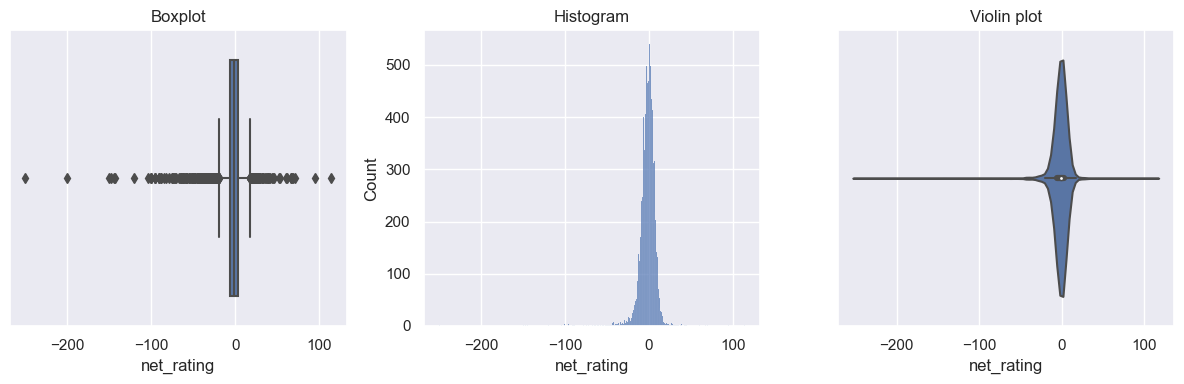

In [18]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

# Boxplot
sb.boxplot(x=nba_df['net_rating'], ax=axs[0])
axs[0].set_xlabel('net_rating')
axs[0].set_title('Boxplot')

# Histogram
sb.histplot(x=nba_df['net_rating'], ax=axs[1])
axs[1].set_xlabel('net_rating')
axs[1].set_title('Histogram')

# Violin plot
sb.violinplot(x=nba_df['net_rating'], ax=axs[2])
axs[2].set_xlabel('net_rating')
axs[2].set_title('Violin plot')

# Adjust the layout and display the plots
plt.tight_layout()
plt.show()

From the plots above, we can tell that 'net_rating' is an extremely skewed set of data. Hence, to get a better distribution and have a better view of how the predictor variables affect 'net_rating', we have decided to remove the outliers.

In [19]:
# Determining quartile ranges for net_rating
q1 = nba_df['net_rating'].quantile(0.25)
q3 = nba_df['net_rating'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Filter the DataFrame to remove outliers
nba_df = nba_df[(nba_df['net_rating'] >= lower_bound) & (nba_df['net_rating'] <= upper_bound)]

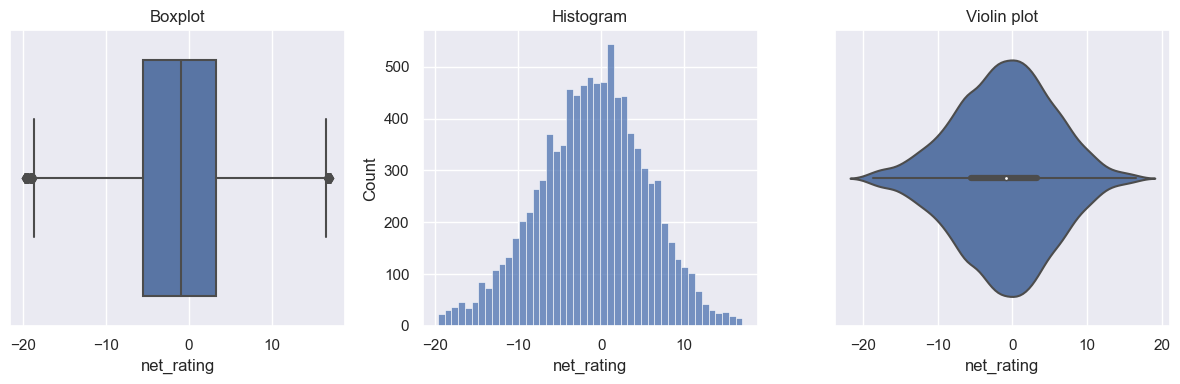

In [20]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

# Boxplot
sb.boxplot(x=nba_df['net_rating'], ax=axs[0])
axs[0].set_xlabel('net_rating')
axs[0].set_title('Boxplot')

# Histogram
sb.histplot(x=nba_df['net_rating'], ax=axs[1])
axs[1].set_xlabel('net_rating')
axs[1].set_title('Histogram')

# Violin plot
sb.violinplot(x=nba_df['net_rating'], ax=axs[2])
axs[2].set_xlabel('net_rating')
axs[2].set_title('Violin plot')

# Adjust the layout and display the plots
plt.tight_layout()
plt.show()

Personal Attributes:

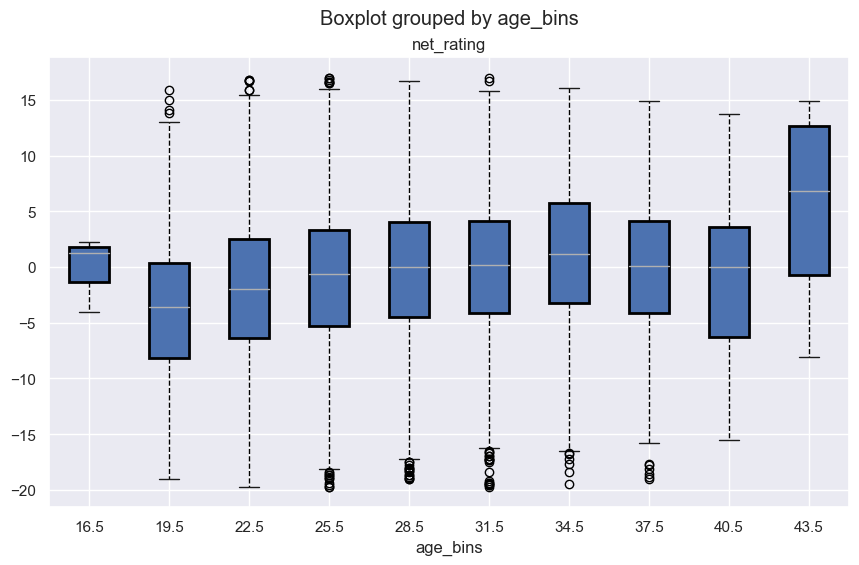

In [21]:
colors = ['#000000']



boxprops = dict(linestyle='-', linewidth=2, color='black')
whiskerprops = dict(linestyle='--', linewidth=1, color='black')

fig, ax = plt.subplots(figsize=(10,6))
nba_df.boxplot(column='net_rating', by='age_bins', ax=ax, patch_artist=True, boxprops=boxprops, whiskerprops=whiskerprops)

for i, (age, color) in enumerate(zip(nba_df['age_bins'].unique(), colors)):
    for patch in ax.artists[i*6:i*6+6]:
        patch.set_facecolor(color)

plt.show()

In [22]:
correlation = nba_df['age_bins'].corr(nba_df['net_rating'])
print("Correlation: " ,correlation)

Correlation:  0.1577688168735361


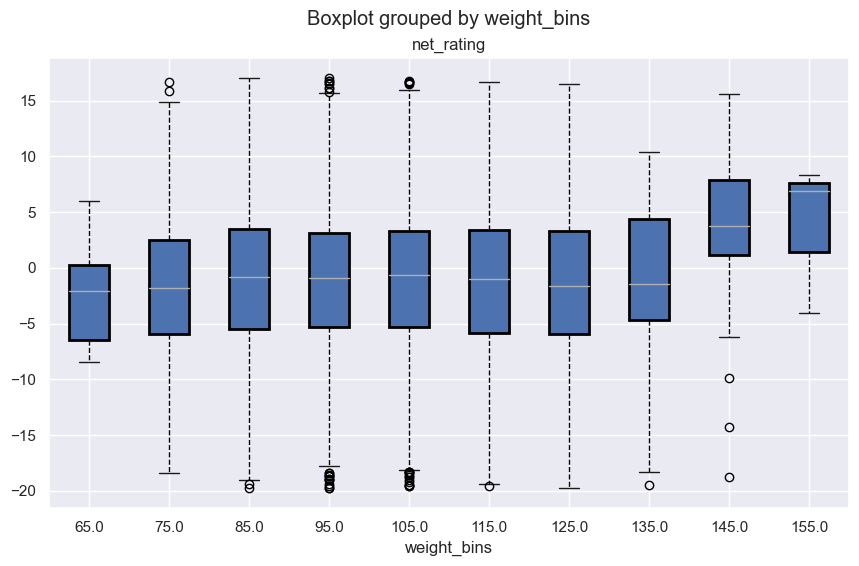

In [23]:
boxprops = dict(linestyle='-', linewidth=2, color='black')
whiskerprops = dict(linestyle='--', linewidth=1, color='black')

fig, ax = plt.subplots(figsize=(10,6))
nba_df.boxplot(column='net_rating', by='weight_bins', ax=ax, patch_artist=True, boxprops=boxprops, whiskerprops=whiskerprops)

for i, (age, color) in enumerate(zip(nba_df['weight_bins'].unique(), colors)):
    for patch in ax.artists[i*6:i*6+6]:
        patch.set_facecolor(color)

plt.show()

In [24]:
correlation = nba_df['weight_bins'].corr(nba_df['net_rating'])
print("Correlation: " ,correlation)

Correlation:  -0.0017342457896275768


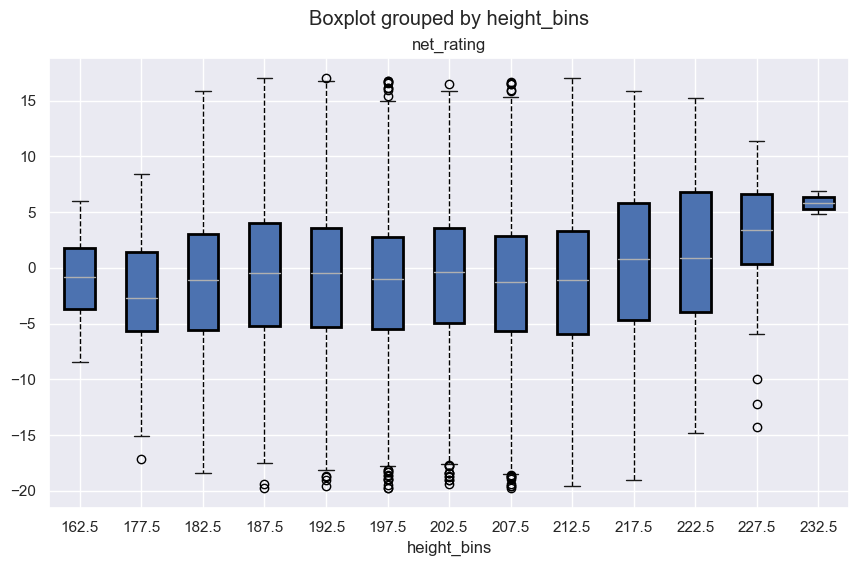

In [25]:
boxprops = dict(linestyle='-', linewidth=2, color='black')
whiskerprops = dict(linestyle='--', linewidth=1, color='black')

fig, ax = plt.subplots(figsize=(10,6))
nba_df.boxplot(column='net_rating', by='height_bins', ax=ax, patch_artist=True, boxprops=boxprops, whiskerprops=whiskerprops)

for i, (age, color) in enumerate(zip(nba_df['height_bins'].unique(), colors)):
    for patch in ax.artists[i*6:i*6+6]:
        patch.set_facecolor(color)

plt.show()

In [26]:
correlation = nba_df['height_bins'].corr(nba_df['net_rating'])
print("Correlation: " ,correlation)

Correlation:  -0.007876105907565819


Personal stats:

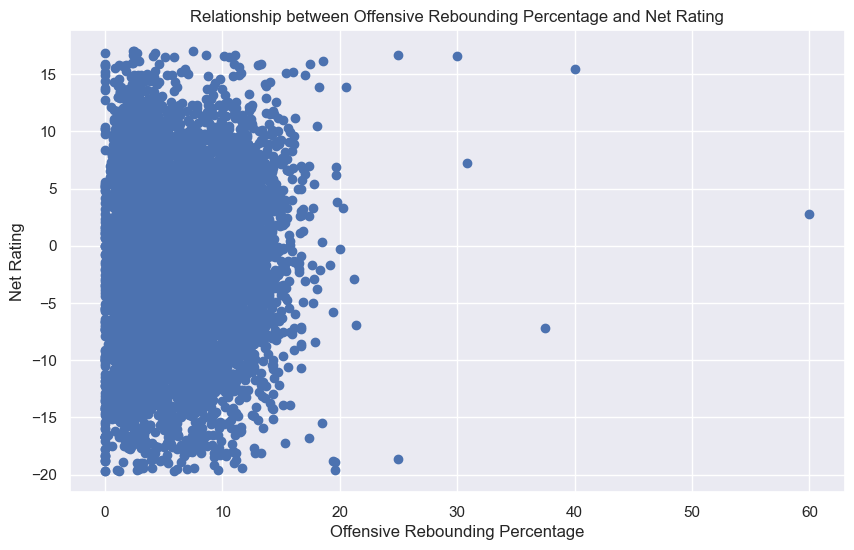

In [27]:
plt.figure(figsize=(10,6))
plt.scatter(nba_df['oreb_pct'], nba_df['net_rating'])
plt.xlabel('Offensive Rebounding Percentage')
plt.ylabel('Net Rating')
plt.title('Relationship between Offensive Rebounding Percentage and Net Rating')
plt.show()

In [28]:
correlation = nba_df['oreb_pct'].corr(nba_df['net_rating'])
print("Correlation: " ,correlation)

Correlation:  0.01620721394271988


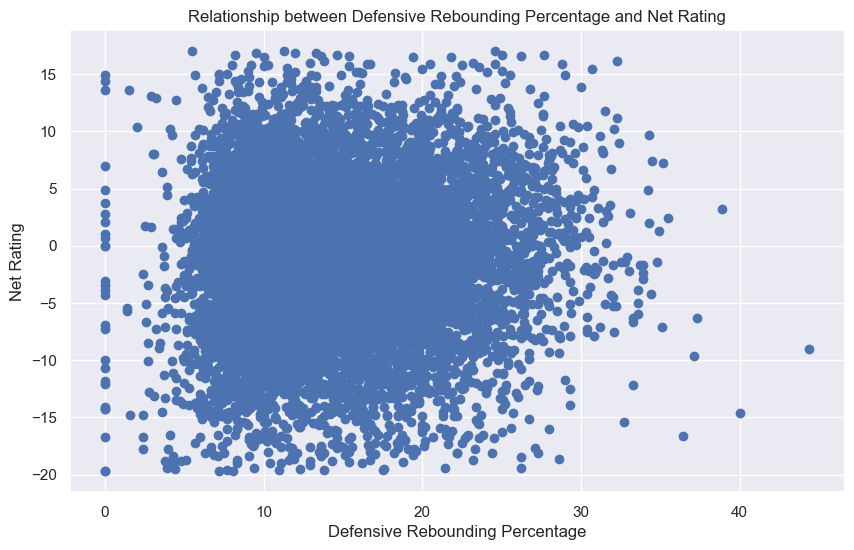

In [29]:
plt.figure(figsize=(10,6))
plt.scatter(nba_df['dreb_pct'], nba_df['net_rating'])
plt.xlabel('Defensive Rebounding Percentage')
plt.ylabel('Net Rating')
plt.title('Relationship between Defensive Rebounding Percentage and Net Rating')
plt.show()

In [30]:
correlation = nba_df['dreb_pct'].corr(nba_df['net_rating'])
print(correlation)

0.0448773466592668


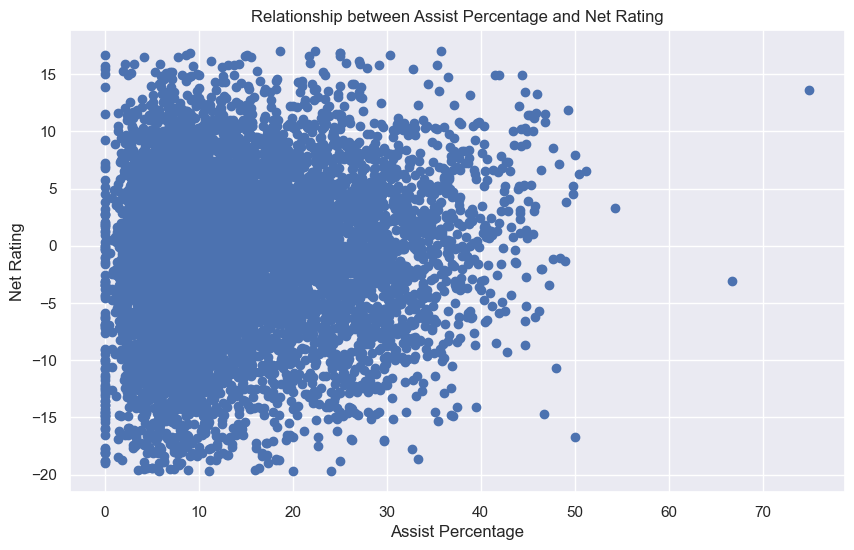

In [31]:
plt.figure(figsize=(10,6))
plt.scatter(nba_df['ast_pct'], nba_df['net_rating'])
plt.xlabel('Assist Percentage')
plt.ylabel('Net Rating')
plt.title('Relationship between Assist Percentage and Net Rating')
plt.show()

In [32]:
correlation = nba_df['ast_pct'].corr(nba_df['net_rating'])
print("Correlation: " ,correlation)

Correlation:  0.109741964371252


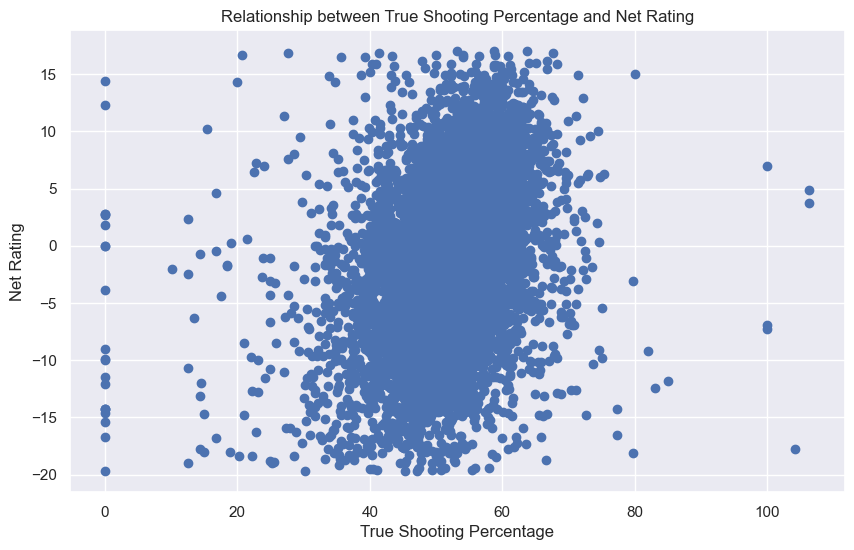

In [33]:
plt.figure(figsize=(10,6))
plt.scatter(nba_df['ts_pct'], nba_df['net_rating'])
plt.xlabel('True Shooting Percentage')
plt.ylabel('Net Rating')
plt.title('Relationship between True Shooting Percentage and Net Rating')
plt.show()

In [34]:
correlation = nba_df['ts_pct'].corr(nba_df['net_rating'])
print("Correlation: " ,correlation)

Correlation:  0.3214180090601262


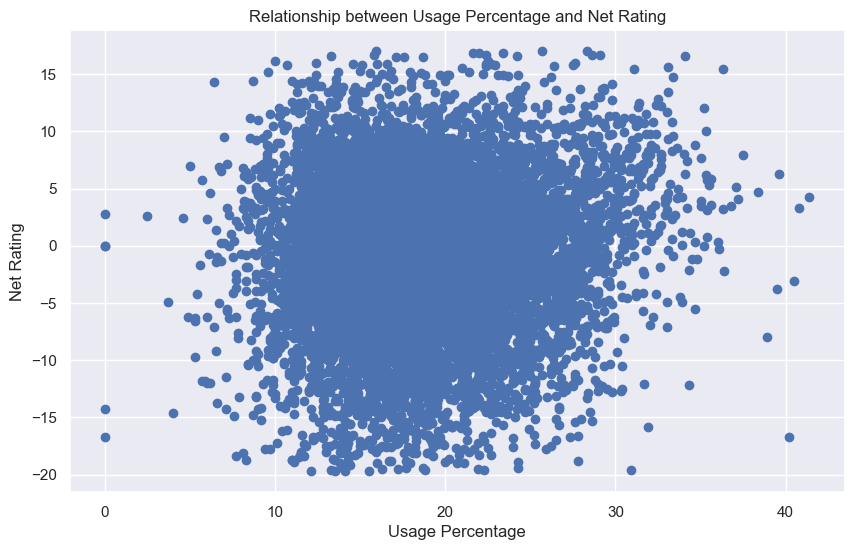

In [35]:
plt.figure(figsize=(10,6))
plt.scatter(nba_df['usg_pct'], nba_df['net_rating'])
plt.xlabel('Usage Percentage')
plt.ylabel('Net Rating')
plt.title('Relationship between Usage Percentage and Net Rating')
plt.show()

In [36]:
correlation = nba_df['usg_pct'].corr(nba_df['net_rating'])
print("Correlation: " ,correlation)

Correlation:  0.08185224599295958


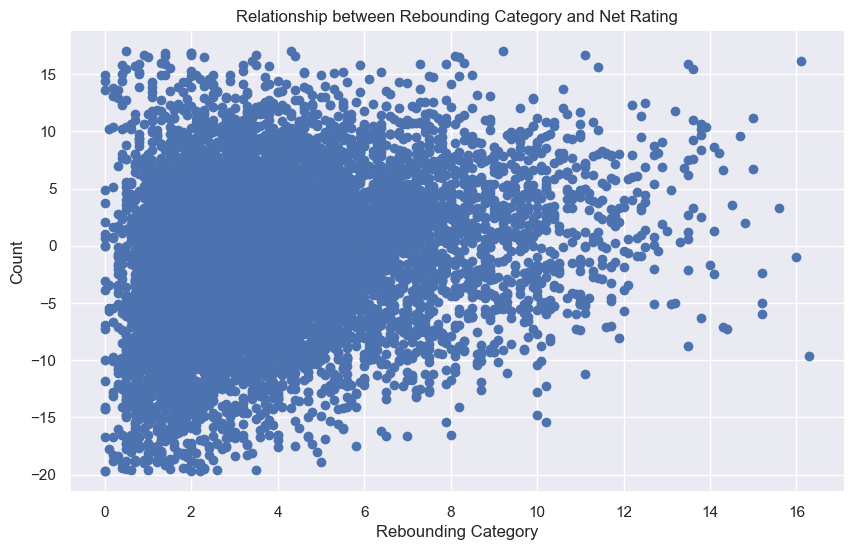

In [37]:
plt.figure(figsize=(10,6))
plt.scatter(nba_df['reb'], nba_df['net_rating'])
plt.xlabel('Rebounding Category')
plt.ylabel('Count')
plt.title('Relationship between Rebounding Category and Net Rating')
plt.show()

In [38]:
correlation = nba_df['reb'].corr(nba_df['net_rating'])
print("Correlation: " ,correlation)

Correlation:  0.2258208847248855


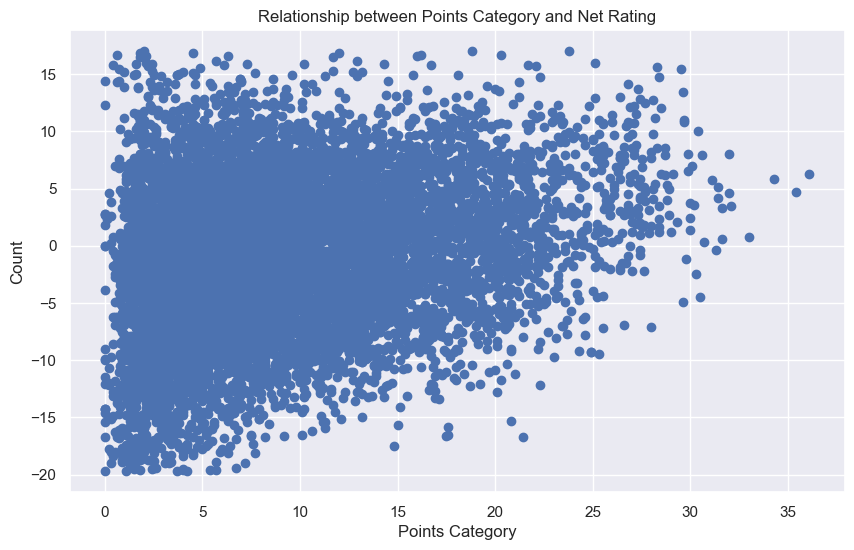

In [39]:
plt.figure(figsize=(10,6))
plt.scatter(nba_df['pts'], nba_df['net_rating'])
plt.xlabel('Points Category')
plt.ylabel('Count')
plt.title('Relationship between Points Category and Net Rating')
plt.show()

In [40]:
correlation = nba_df['pts'].corr(nba_df['net_rating'])
print("Correlation: " ,correlation)

Correlation:  0.2727545520608436


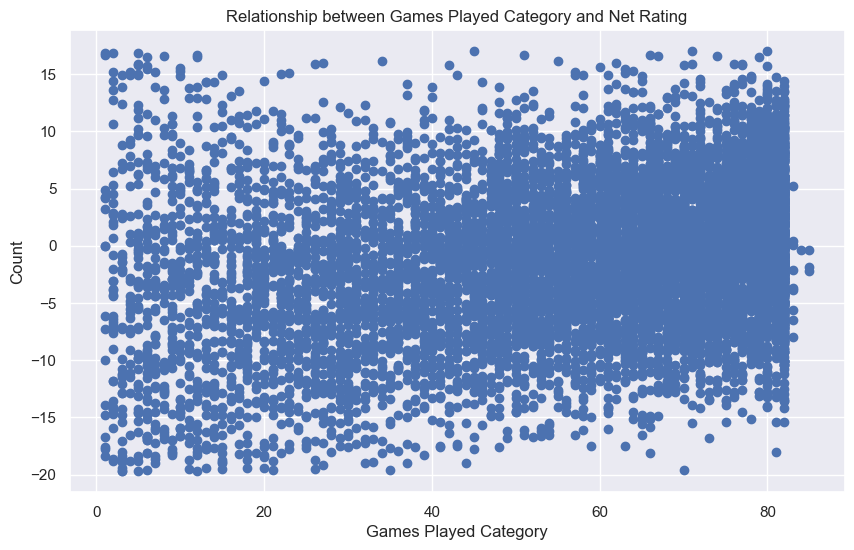

In [57]:
plt.figure(figsize=(10,6))
plt.scatter(nba_df['gp'], nba_df['net_rating'])
plt.xlabel('Games Played Category')
plt.ylabel('Count')
plt.title('Relationship between Games Played Category and Net Rating')
plt.show()

In [42]:
correlation = nba_df['gp'].corr(nba_df['net_rating'])
print("Correlation: " ,correlation)

Correlation:  0.2731300118544907


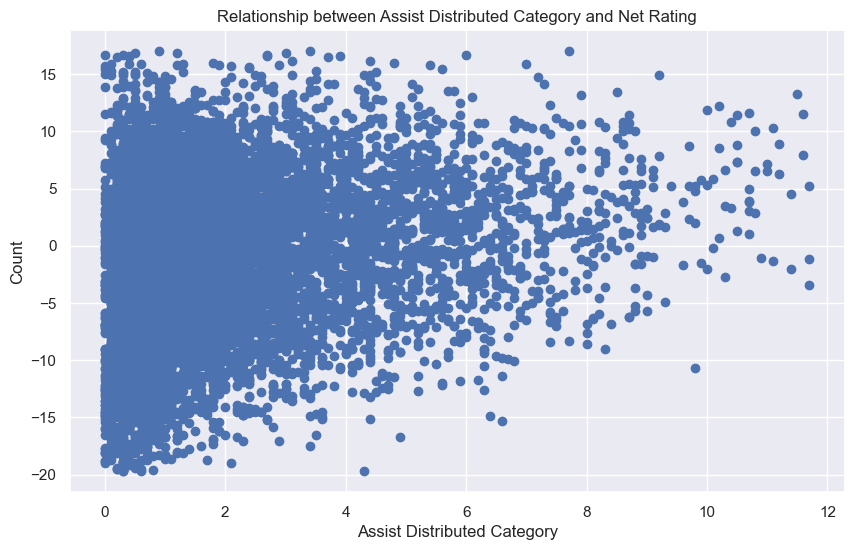

In [58]:
plt.figure(figsize=(10,6))
plt.scatter(nba_df['ast'], nba_df['net_rating'])
plt.xlabel('Assist Distributed Category')
plt.ylabel('Count')
plt.title('Relationship between Assist Distributed Category and Net Rating')
plt.show()

In [44]:
correlation = nba_df['ast'].corr(nba_df['net_rating'])
print("Correlation: " ,correlation)

Correlation:  0.21695155702767005


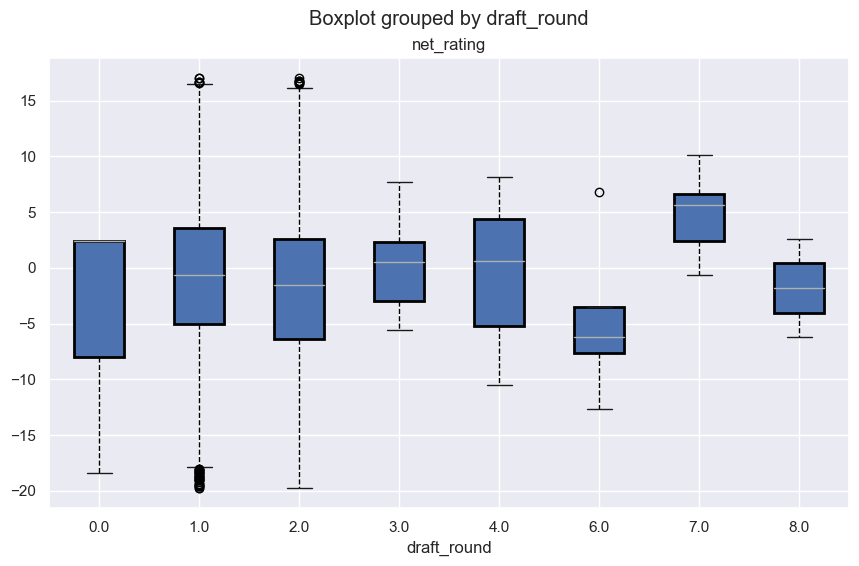

In [45]:
boxprops = dict(linestyle='-', linewidth=2, color='black')
whiskerprops = dict(linestyle='--', linewidth=1, color='black')

fig, ax = plt.subplots(figsize=(10,6))
nba_df.boxplot(column='net_rating', by='draft_round', ax=ax, patch_artist=True, boxprops=boxprops, whiskerprops=whiskerprops)

for i, (age, color) in enumerate(zip(nba_df['draft_round'].unique(), colors)):
    for patch in ax.artists[i*6:i*6+6]:
        patch.set_facecolor(color)

plt.show()

In [46]:
correlation = nba_df['draft_round'].corr(nba_df['net_rating'])
print("Correlation: " ,correlation)

Correlation:  -0.055926817495501456


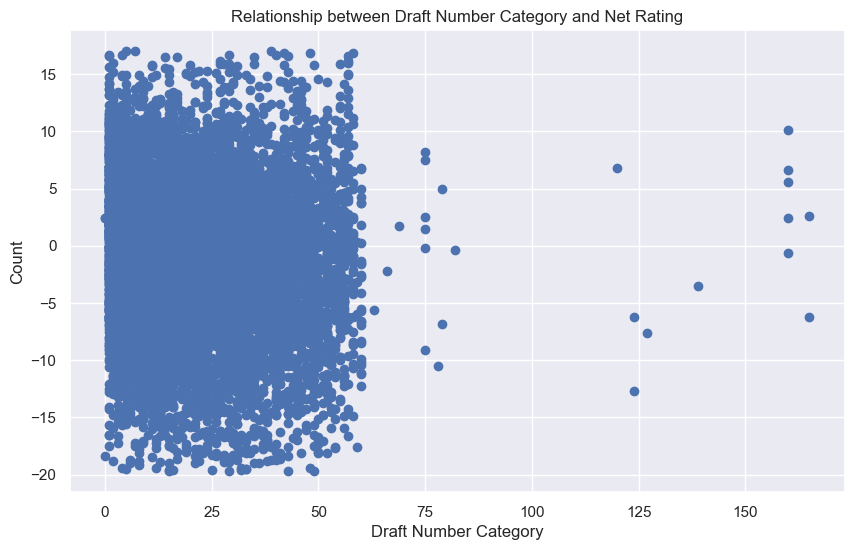

In [59]:
plt.figure(figsize=(10,6))
plt.scatter(nba_df['draft_number'], nba_df['net_rating'])
plt.xlabel('Draft Number Category')
plt.ylabel('Count')
plt.title('Relationship between Draft Number Category and Net Rating')
plt.show()

In [48]:
correlation = nba_df['draft_number'].corr(nba_df['net_rating'])
print("Correlation: " ,correlation)

Correlation:  -0.07557536342763303


<AxesSubplot:>

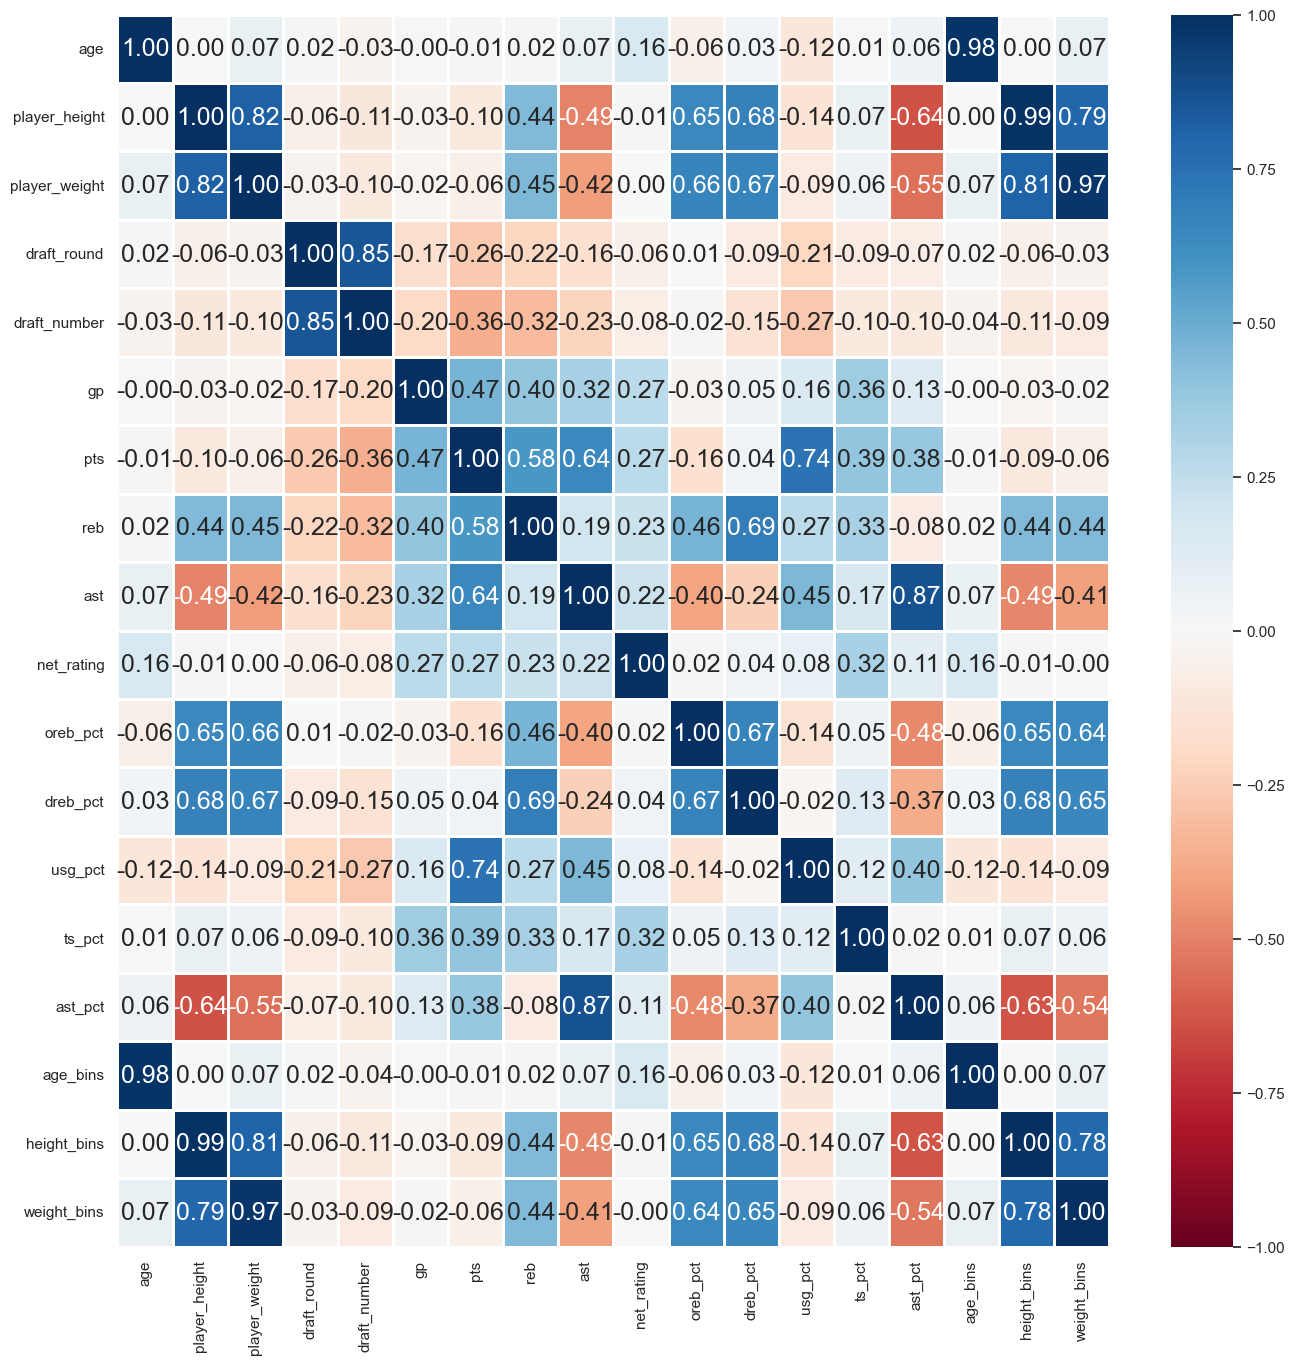

In [49]:
f = plt.figure(figsize = (16, 16))
sb.heatmap(nba_df.corr(), vmin=-1, vmax=1, linewidths=1,
           annot=True, fmt=".2f", annot_kws={"size": 18}, cmap="RdBu")

Visually, from the boxplots of predictor variables against net_rating, there is little to no distinct linear relationship. Hence, we propose that correlation might be non-linear. To explore the non-linear relationship, we decided to use Kendall's Rank Coefficient as a measure of non-linear correlation as it is particularly useful when dealing with non-parametric data, or data that does not meet the assumptions of normality or homogeneity of variance.

In [50]:
kendall_corr_matrix = nba_df.corr(method='kendall')

<AxesSubplot:>

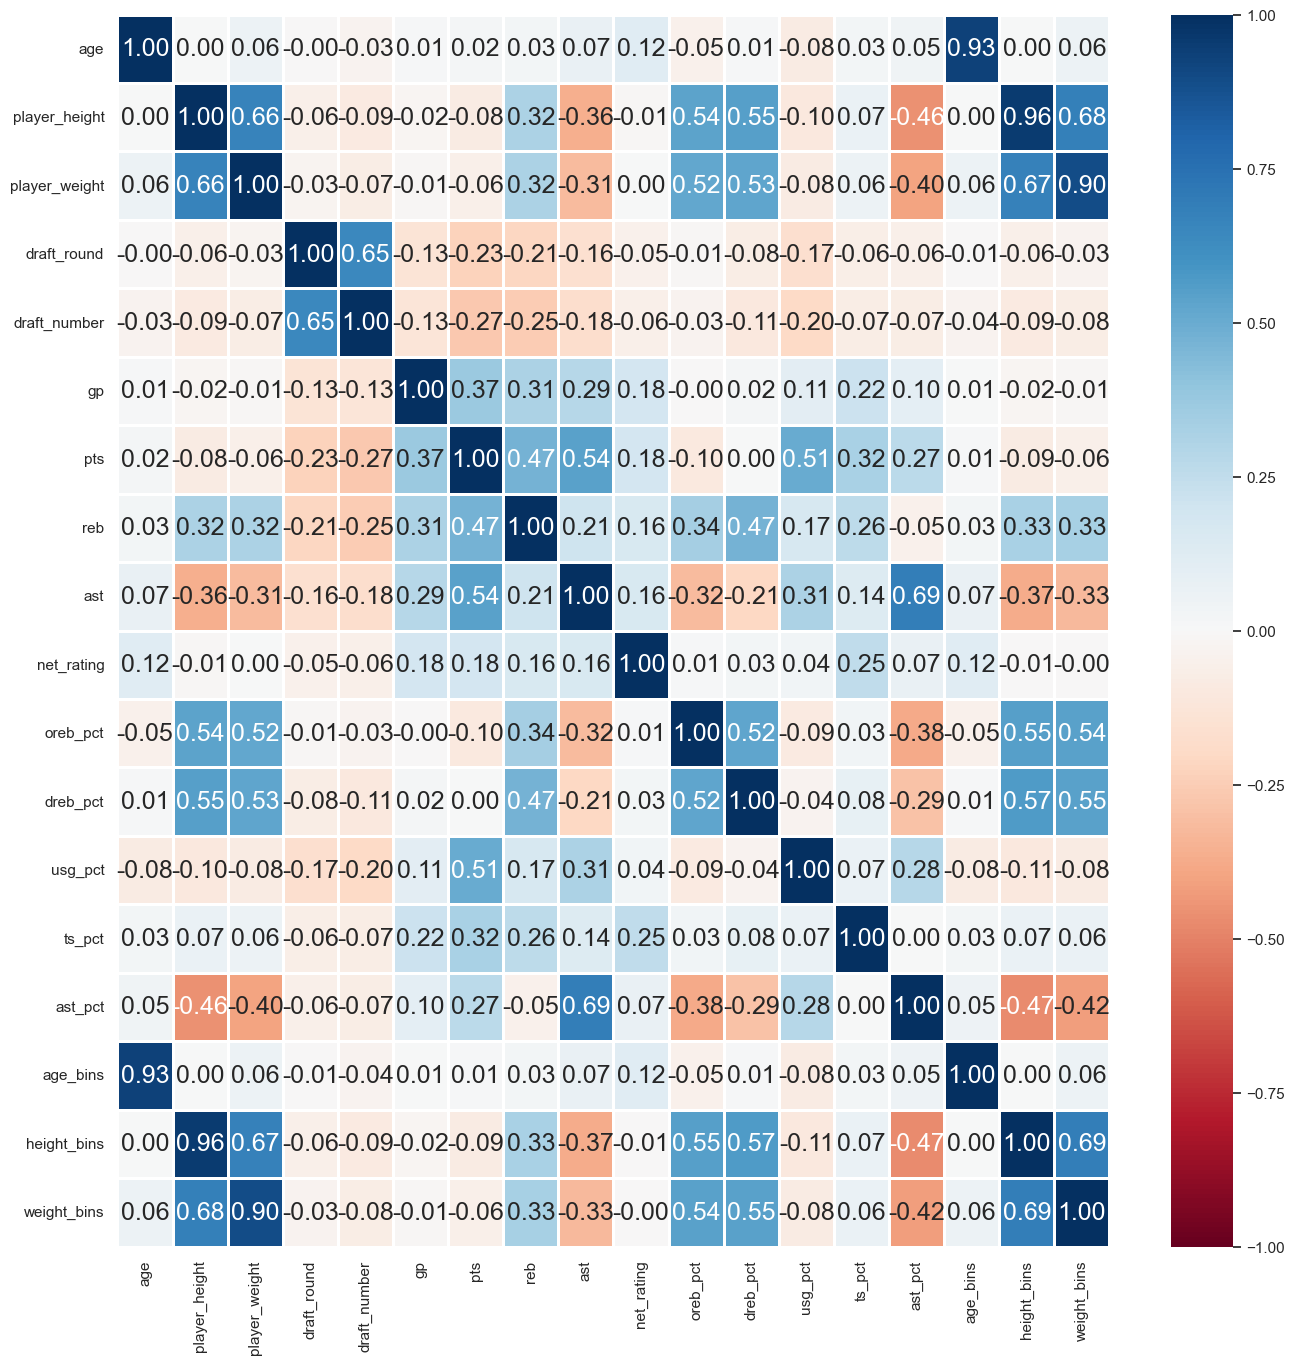

In [51]:
f = plt.figure(figsize = (16, 16))
sb.heatmap(kendall_corr_matrix, vmin=-1, vmax=1, linewidths=1,
           annot=True, fmt=".2f", annot_kws={"size": 18}, cmap="RdBu")

Even so, the non-linear correlationship seems very weak.

# Machine Learning

As seen above, the correlation of personal stats and attributes of the players and their net rating are low as seen from the Pearson and Kendall's rank coefficient values, showing that the relationship is complex.

Hence, we will plan to proceed using a decision tree model as our machine learning prediction model as a strong relationship is not necessary for the model to function.

In [52]:
y = nba_df['net_rating']
x = nba_df.drop('net_rating', axis=1)
mi_scores = mutual_info_regression(x, y)
k = 5
top_k_indices = np.argsort(mi_scores)[-k:]
top_k_features = x.columns[top_k_indices]
print(top_k_features)

Index(['reb', 'ast', 'pts', 'gp', 'ts_pct'], dtype='object')


In [53]:
predictors_df = pd.DataFrame(nba_df[['gp', 'pts', 'reb', 'ast', 'ts_pct']])
response_df = nba_df['net_rating']
predictors_train, predictors_test, response_train, response_test = train_test_split(predictors_df, response_df, test_size = 0.2)

[Text(0.5, 0.9, 'ts_pct <= 52.15\nsquared_error = 41.993\nsamples = 7725\nvalue = -1.043'),
 Text(0.25, 0.7, 'ts_pct <= 48.25\nsquared_error = 40.33\nsamples = 3508\nvalue = -3.29'),
 Text(0.125, 0.5, 'gp <= 75.5\nsquared_error = 46.243\nsamples = 1692\nvalue = -4.623'),
 Text(0.0625, 0.3, 'ts_pct <= 41.15\nsquared_error = 46.745\nsamples = 1566\nvalue = -4.863'),
 Text(0.03125, 0.1, 'squared_error = 61.251\nsamples = 431\nvalue = -6.061'),
 Text(0.09375, 0.1, 'squared_error = 40.484\nsamples = 1135\nvalue = -4.408'),
 Text(0.1875, 0.3, 'pts <= 7.15\nsquared_error = 30.378\nsamples = 126\nvalue = -1.638'),
 Text(0.15625, 0.1, 'squared_error = 26.414\nsamples = 72\nvalue = -0.076'),
 Text(0.21875, 0.1, 'squared_error = 28.076\nsamples = 54\nvalue = -3.72'),
 Text(0.375, 0.5, 'gp <= 47.5\nsquared_error = 31.624\nsamples = 1816\nvalue = -2.048'),
 Text(0.3125, 0.3, 'reb <= 1.75\nsquared_error = 40.097\nsamples = 479\nvalue = -3.489'),
 Text(0.28125, 0.1, 'squared_error = 46.315\nsamples =

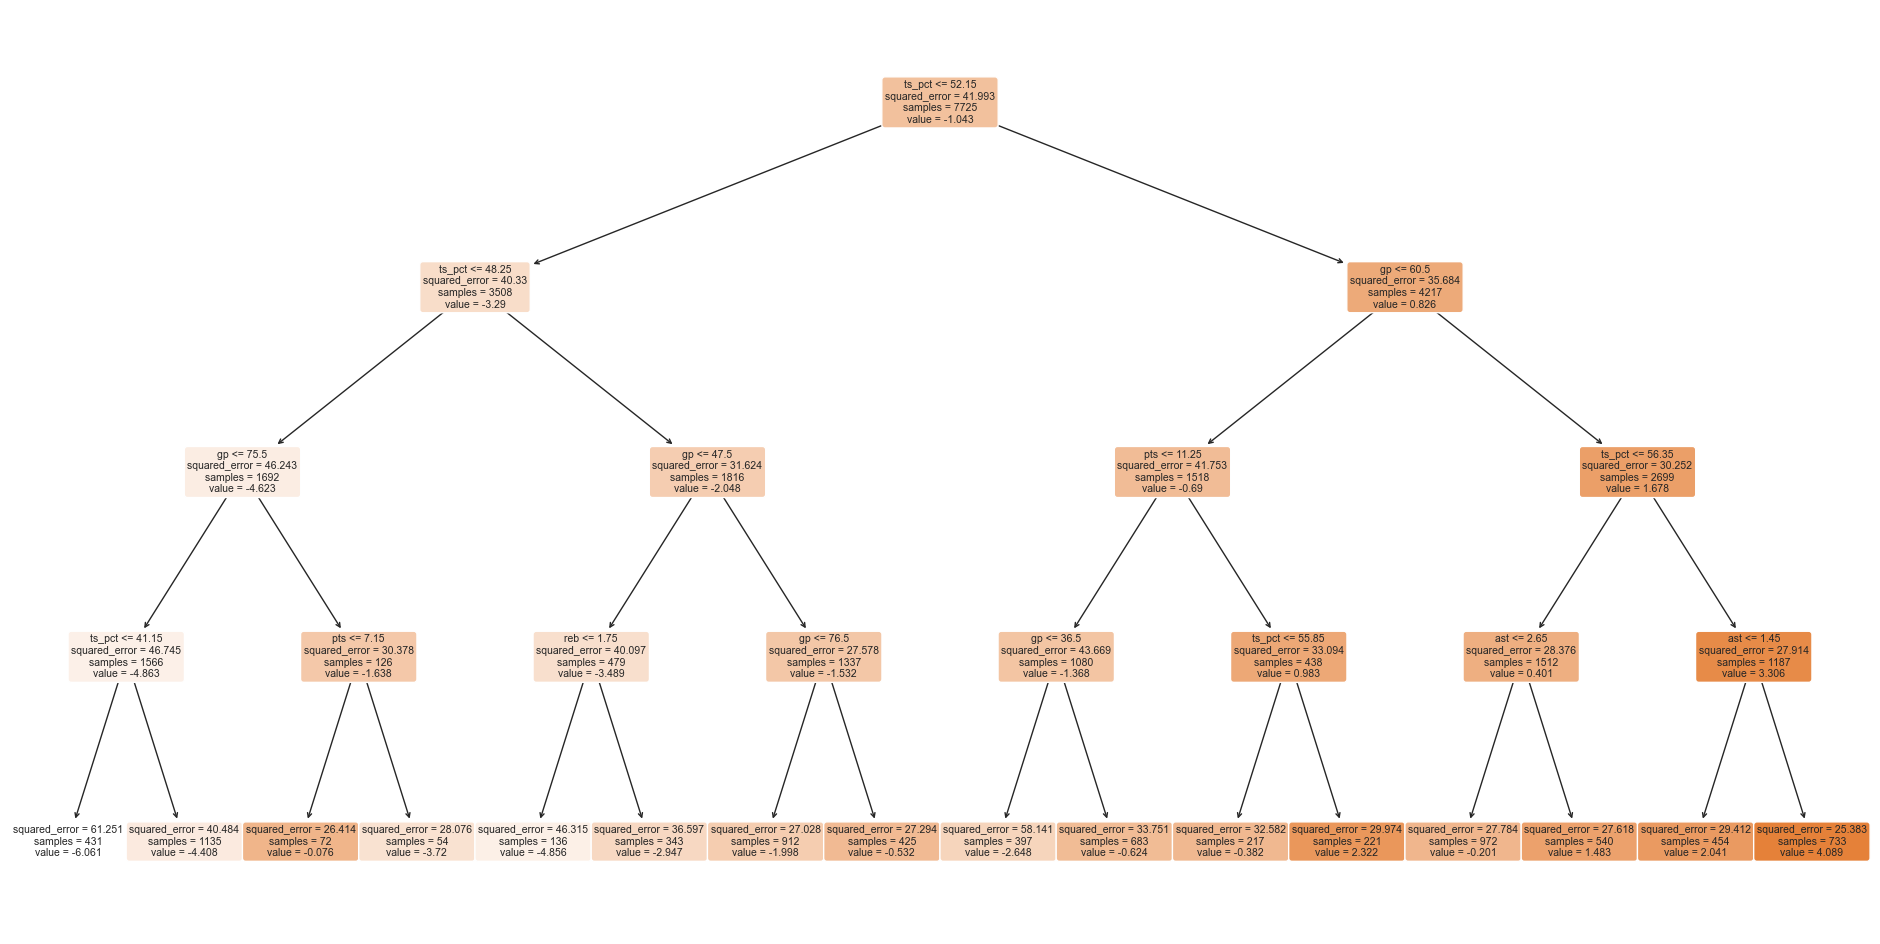

In [54]:
dectree = DecisionTreeRegressor(max_depth = 4) 
dectree.fit(predictors_train, response_train) 

f = plt.figure(figsize=(24,12))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names = predictors_train.columns, 
          class_names = ["N","Y"])

In [55]:
scoring = {'mae': 'neg_mean_absolute_error',
           'mse': 'neg_mean_squared_error',
           'r2': 'r2'}

cv_results = cross_validate(dectree, predictors_df, response_df, cv=5, scoring=scoring)

mae_cv = abs(np.mean(cv_results['test_mae']))
mse_cv = abs(np.mean(cv_results['test_mse']))
r2_cv = np.mean(cv_results['test_r2'])

print("Mean Absolute Error (CV):", mae_cv)
print("Mean Squared Error (CV):", mse_cv)
print("R^2 score (CV):", r2_cv)

Mean Absolute Error (CV): 4.8020837564628795
Mean Squared Error (CV): 36.67583060658008
R^2 score (CV): 0.1329766538789071


An R-squared value of 0.133 means that the predictor variables can only explain 13.3% of the variability in the response variable. Furthermore, taking in account the high MAE and MSE values, this suggests that there are other factors beyond the predictor variables that are affecting the response variable.

Hence, we can conclude that personal stats and physical attributes only play a small role in determining a player's impact on the court in the NBA, both on the defensive and offensive side.